## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy

## Initialize ImageData Generator

In [2]:
training_image_generator = ImageDataGenerator(rescale = 1./255,
                                              zoom_range = 0.1,
                                              rotation_range = 15,
                                              width_shift_range = 0.05,
                                              height_shift_range = 0.05,
                                              vertical_flip = True
                                             )

## Load Images 

In [3]:
training_iterator = training_image_generator.flow_from_directory('Covid19-dataset/train',
                                                                 class_mode = 'categorical',
                                                                 color_mode = 'grayscale',
                                                                 batch_size = 12,
                                                                 target_size = (128, 128)
                                                                )

Found 251 images belonging to 3 classes.


In [4]:
training_iterator.samples


251

In [5]:
sample_batch_input, sample_labels = training_iterator.next()

In [6]:
sample_batch_input.shape

(12, 128, 128, 1)

In [7]:
sample_labels.shape

(12, 3)

## Building the model

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.Input(shape = (128, 128, 1)))
model.add(layers.Conv2D(8, 3, strides=3, padding = 'same', activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(5, 3, strides=1, padding = 'same', activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(3, 3, strides=1, padding = 'same', activation="relu"))
model.add(tf.keras.layers.Conv2D(2, 2, strides=1, padding = 'same', activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())
model.add(layers.Dense(3,activation="softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 21, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 5)         365       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 5)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 5)         0

## Initialize image generator

In [10]:
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [11]:
validation_iterator = validation_image_generator.flow_from_directory(
                                                                'Covid19-dataset/test', 
                                                                class_mode = 'categorical', 
                                                                color_mode = 'grayscale', 
                                                                batch_size = 12,
                                                                target_size = (128, 128)
                                                        )

Found 66 images belonging to 3 classes.


In [12]:
validation_iterator.samples

66

## Train model

In [13]:
teal = EarlyStopping(monitor = 'val_loss', mode = 'min' , patience = 20,verbose = 1)

In [14]:
history = model.fit(training_iterator,
                    steps_per_epoch=training_iterator.samples/12, epochs=100,
                    validation_data=validation_iterator,
                    validation_steps=validation_iterator.samples/12,
                    callbacks=[teal])

Epoch 1/100
20/20 [==============================] - 3s 73ms/step - loss: 1.1190 - categorical_accuracy: 0.3187 - auc: 0.4834 - val_loss: 1.0920 - val_categorical_accuracy: 0.5000 - val_auc: 0.5913
Epoch 2/100
20/20 [==============================] - 1s 62ms/step - loss: 1.0923 - categorical_accuracy: 0.3546 - auc: 0.5445 - val_loss: 1.0898 - val_categorical_accuracy: 0.4091 - val_auc: 0.5888
Epoch 3/100
20/20 [==============================] - 1s 68ms/step - loss: 1.0875 - categorical_accuracy: 0.4064 - auc: 0.5689 - val_loss: 1.0893 - val_categorical_accuracy: 0.3939 - val_auc: 0.5901
Epoch 4/100
20/20 [==============================] - 1s 59ms/step - loss: 1.0789 - categorical_accuracy: 0.4263 - auc: 0.5925 - val_loss: 1.0877 - val_categorical_accuracy: 0.3939 - val_auc: 0.5811
Epoch 5/100
20/20 [==============================] - 1s 55ms/step - loss: 1.0944 - categorical_accuracy: 0.4303 - auc: 0.5393 - val_loss: 1.0879 - val_categorical_accuracy: 0.3939 - val_auc: 0.5765
Epoch 6/10

20/20 [==============================] - 1s 54ms/step - loss: 0.4867 - categorical_accuracy: 0.7769 - auc: 0.9316 - val_loss: 0.5153 - val_categorical_accuracy: 0.8030 - val_auc: 0.9330
Epoch 43/100
20/20 [==============================] - 1s 53ms/step - loss: 0.4635 - categorical_accuracy: 0.8088 - auc: 0.9417 - val_loss: 0.5871 - val_categorical_accuracy: 0.7424 - val_auc: 0.9059
Epoch 44/100
20/20 [==============================] - 1s 55ms/step - loss: 0.4682 - categorical_accuracy: 0.8167 - auc: 0.9388 - val_loss: 0.4934 - val_categorical_accuracy: 0.8182 - val_auc: 0.9346
Epoch 45/100
20/20 [==============================] - 1s 58ms/step - loss: 0.4232 - categorical_accuracy: 0.8526 - auc: 0.9541 - val_loss: 0.4964 - val_categorical_accuracy: 0.8182 - val_auc: 0.9351
Epoch 46/100
20/20 [==============================] - 1s 55ms/step - loss: 0.4082 - categorical_accuracy: 0.8327 - auc: 0.9529 - val_loss: 0.5041 - val_categorical_accuracy: 0.8030 - val_auc: 0.9291
Epoch 47/100
20/20

20/20 [==============================] - 1s 57ms/step - loss: 0.3443 - categorical_accuracy: 0.8446 - auc: 0.9656 - val_loss: 0.4629 - val_categorical_accuracy: 0.8030 - val_auc: 0.9426
Epoch 84/100
20/20 [==============================] - 1s 54ms/step - loss: 0.3510 - categorical_accuracy: 0.8725 - auc: 0.9669 - val_loss: 0.5011 - val_categorical_accuracy: 0.7727 - val_auc: 0.9319
Epoch 85/100
20/20 [==============================] - 1s 61ms/step - loss: 0.3506 - categorical_accuracy: 0.8486 - auc: 0.9668 - val_loss: 0.4658 - val_categorical_accuracy: 0.8030 - val_auc: 0.9463
Epoch 86/100
20/20 [==============================] - 1s 59ms/step - loss: 0.3814 - categorical_accuracy: 0.8606 - auc: 0.9587 - val_loss: 0.4760 - val_categorical_accuracy: 0.7879 - val_auc: 0.9387
Epoch 87/100
20/20 [==============================] - 1s 55ms/step - loss: 0.3255 - categorical_accuracy: 0.8884 - auc: 0.9701 - val_loss: 0.4616 - val_categorical_accuracy: 0.8182 - val_auc: 0.9488
Epoch 88/100
20/20

## Visualize trained model

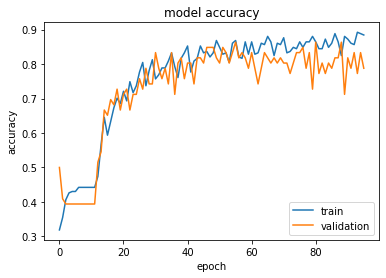

In [15]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

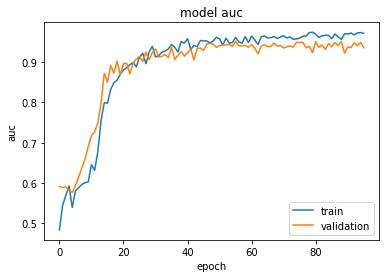

In [16]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.xlabel('epoch')
plt.ylabel('auc')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [17]:
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
predicted_class = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
final_report = classification_report(true_classes, predicted_class, target_names=class_labels)
print(final_report)

              precision    recall  f1-score   support

       Covid       0.29      0.23      0.26        26
      Normal       0.37      0.35      0.36        20
   Pneumonia       0.31      0.40      0.35        20

    accuracy                           0.32        66
   macro avg       0.32      0.33      0.32        66
weighted avg       0.32      0.32      0.31        66



In [18]:
cm=confusion_matrix(true_classes,predicted_class)
print(cm)

[[ 6  7 13]
 [ 8  7  5]
 [ 7  5  8]]
